# Mini-Project CS105
## What factors contribute to a student's performance?
Contributors: Magalie Huertero, Emilia Silverman, Arik Lee, Jonah Millard

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import chi2_contingency, chi2
df_original = pd.read_csv("datasets/cleandatav3.csv")

### Dataset
Our dataset contains survey answers from various Computer Science related courses taken Winter of 2026. The primary questions we focused on to gain insight of a students performance here at UCR were: Think about your favorite course (4 units) . Why was it your favorite course?, Rank the resources that have been helpful to your success in your favorite course, What class(es) do you think prepared you most for the career field you want to pursue?, and Think about your time at UCR. When did you experience the following?. We intend to look at a variety of distribution to gain an overall understanding of how other variables may affect a students performance at UCR.(Gender, Class Standing, GPA, etc.)

### Topic Overview
For our project we wanted to analyze what features contributed to a student’s performance. For that we cleaned and prepped the survey csv to only contain the general questions, a cluster of questions regarding concentration, what resources people ended up using the most for studying, and our groups questions. From that we were able to come up with three hypothesis questions and three inference based questions. For our first hypothesis we wanted to see if burn out and sleep deprevation were correlated. For our hypothesis we predicted they would be correlated and would typically see burnout start around week 5. For our second hypothesis we wanted to see what resources were correlated with higher GPA’s. We expected students who attended office hours and students that feel confident in the material to have higher GPA’s. And for our last hypothesis we wanted to see how people who were confident in their ability to teach material felt about their future job prospects. We expected people who were more confident in their ability to teach will be more optimistic when it came to their career prospects. For our three inference questions we wanted to see “What classes prepared students the most (in their opinion) for their future career”, “Why each course was a student’s favorite course”, and “The correlation between gender and ability to focus regarding varying events”.


Major and Identity Proportions-MH


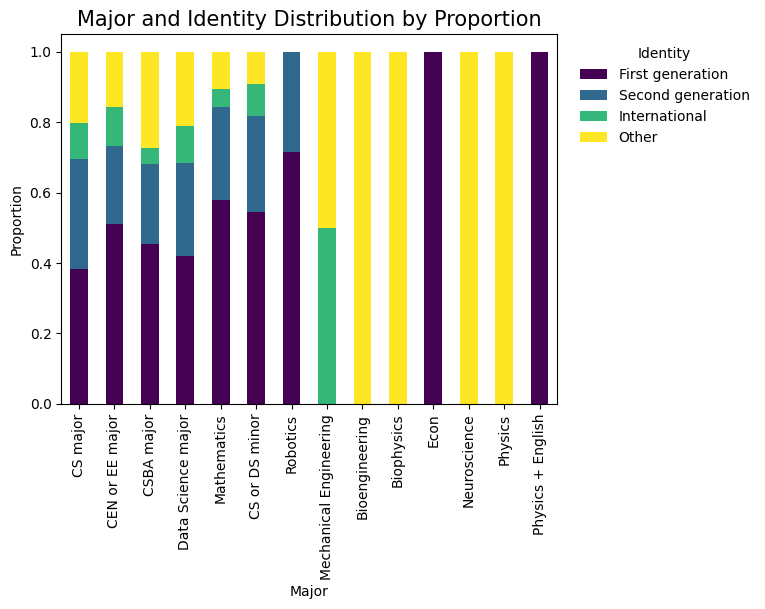

In [ ]:
print("Major and Identity Proportions-MH")

df_i3 = df_original.copy()

major_col = 'What is your major/minor? (If your major is not listed, please write it in "Other..")'
identity_col = 'Select ALL that you identify with:'

df_i3["Major_clean"] = df_i3[major_col].fillna("").astype(str).str.strip()
major_lower = df_i3["Major_clean"].str.lower()

#combines engineering majors
mech_combine = major_lower.str.contains(r"\bmse\b", regex=True, na=False) | major_lower.str.contains("mechanical", na=False)
df_i3.loc[mech_combine , "Major_clean"] = "Mechanical Engineering"

#combines robotics majors
robot_combine  = major_lower.str.contains("robot", na=False)
df_i3.loc[robot_combine , "Major_clean"] = "Robotics"

#combines math majors
math_combine  = major_lower.str.contains("math", na=False)
df_i3.loc[math_combine , "Major_clean"] = "Mathematics"

s = df_i3[identity_col].fillna("").astype(str).str.lower()

is_international = s.str.contains("international", na=False)
is_first = s.str.contains("first", na=False)
is_second = s.str.contains("second", na=False)

df_i3["Identity_group"] = np.select([is_international, is_first, is_second], ["International", "First generation", "Second generation"], default="Other")

identity_order = ["First generation", "Second generation", "International", "Other"]
df_i3["Identity_group"] = pd.Categorical(df_i3["Identity_group"], categories=identity_order, ordered=True)

major_identity_table = pd.crosstab(df_i3["Major_clean"], df_i3["Identity_group"])
major_identity_table = major_identity_table.reindex(columns=identity_order, fill_value=0)

major_identity_proportion = major_identity_table.div(major_identity_table.sum(axis=1), axis=0)
order_idx = major_identity_table.sum(axis=1).sort_values(ascending=False).index
major_identity_proportion = major_identity_proportion.loc[order_idx]
major_identity_proportion.plot(kind="bar", stacked=True, colormap="viridis")

plt.title('Major and Identity Distribution by Proportion', fontsize=14)
plt.ylabel('Proportion')
plt.xlabel('Major')
plt.legend(title="Identity", bbox_to_anchor=(1.02, 1), frameon=False)
plt.show()

This Bar Chart is to show a general distribution of the different types of students in our sample. While this survey was sent out to various Computer Science related courses, not every individual was a computer science major.

### Hypothesis 1: Does the burnout students experience correlate to the sleep deprevation they feel?
##### We expect burnout and sleep deprevation to be correlated and begin starting around week 5 of the quarter.
**Ridge-Plot Graph and Pearson Correlation Test**

Student Behavior Throughout Quarter-MH


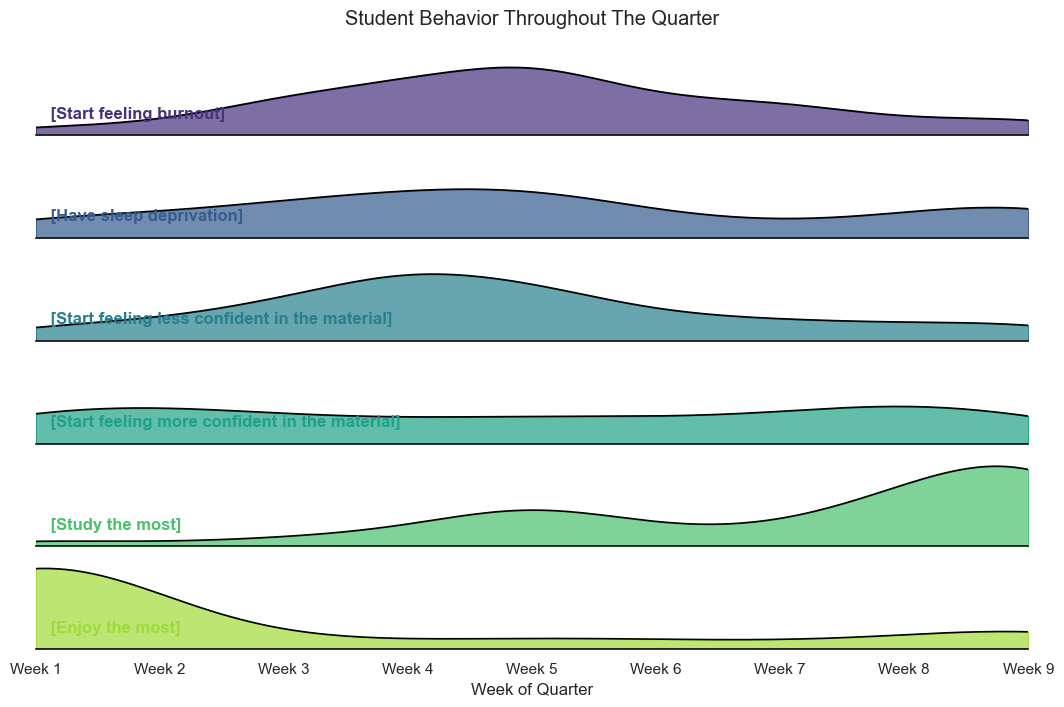

In [5]:
print("Student Behavior Throughout Quarter-MH")

df_h3 = df_original.copy()
week_cols = [c for c in df_h3.columns if "quarter" in c.lower()]

df_weeks = df_h3[week_cols].copy()

for col in week_cols:
    df_weeks[col] = df_weeks[col].astype(str).str.extract(r"(\d+)").astype(float)

long = df_weeks.melt(var_name="Week_Variable", value_name="Week_Number").dropna()

long["Week_Variable"] = long["Week_Variable"].str.replace("Think about your time at UCR. Which week during the quarter do you: ", " ", regex=False)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(long, row="Week_Variable", hue="Week_Variable", aspect=9, height=1.2, palette="viridis")

g.map(sns.kdeplot, "Week_Number", fill=True, alpha=0.7, cut=0, clip=(1, 9))
g.map(sns.kdeplot, "Week_Number", color="black", linewidth=1.2)
g.map(plt.axhline, y=0, linewidth=2, color="black")

def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.01, 0.2, label,
        fontweight="bold",
        color=color,
        transform=ax.transAxes
    )

g.map(label, "Week_Number")
g.set_titles("")
g.set_xlabels("Week of Quarter")
g.set(yticks=[], ylabel="")

for ax in g.axes.flat:
    ax.set_xlim(1, 9)
    ax.set_xticks(range(1, 10))
    ax.set_xticklabels([f"Week {w}" for w in range(1, 10)])

g.despine(left=True)
plt.suptitle("Student Behavior Throughout The Quarter")
plt.tight_layout()
plt.show()


In [6]:
burnout_col = "Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout]"
burnout_week = df_h3[burnout_col].astype(str).str.extract(r"(\d+)").astype(float)
counts = burnout_week.value_counts().sort_index()

peak_week = counts.idxmax()
print("Burnout per week:")
print(counts)

Burnout per week:
0  
1.0     6
2.0     9
3.0    30
4.0    42
5.0    59
6.0    27
7.0    26
8.0    11
9.0    14
Name: count, dtype: int64


In [7]:
burnout_col = "Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout]"
sleep_col = "Think about your time at UCR. Which week during the quarter do you: [Have sleep deprivation]"

burnout_week = df_h3[burnout_col].astype(str).str.extract(r"(\d+)").astype(float)
sleep_week = df_h3[sleep_col].astype(str).str.extract(r"(\d+)").astype(float)

df_compare = pd.concat([burnout_week, sleep_week], axis=1)
df_compare.columns = ["Burnout", "Sleep"]
df_compare = df_compare.dropna()

corr_value = df_compare["Burnout"].corr(df_compare["Sleep"])
print("Pearson correlation:", corr_value)

Pearson correlation: 0.4058064086140493


We want to see if sleep deprevation is correlated to why students feel burnout at a certain week. From our
         Pearson correlation: 0.4058064086140493
We can see that sleep deprevation and burnout are moderately correlated. This means we could assume that sleep deprevation does affect why students feel burnt out. From looking at our plots we see that sleep deprevation peaks right before week 5, this could be due do when students start preparing for midterms they seem to prioritize studing rather than sleep.

Looking at the distribution of students who selected week 5(59 students) as the week they start feeling burn out, we can see the second part of our hypothesis is true. Week 5 is the week students start feeling burnout.

Time Series for Student Behavior-ES


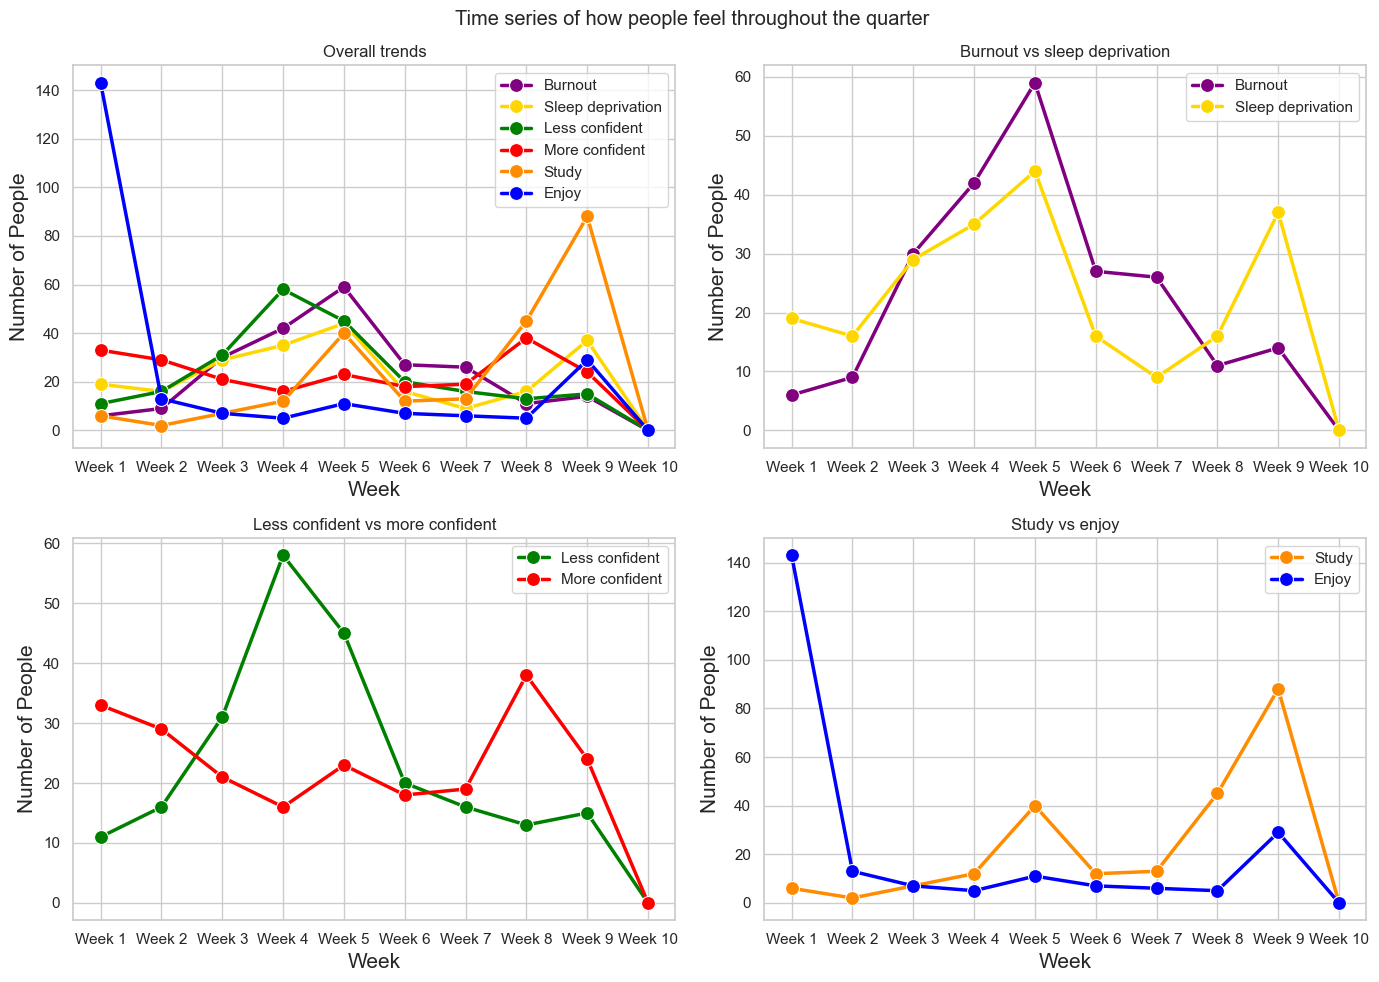

In [18]:
print("Time Series for Student Behavior-ES")
df_h4 = df_original.copy()

# rename column to be shorter
df_h4 = df_h4.rename(columns={
    'Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout]': 'Burnout',
    'Think about your time at UCR. Which week during the quarter do you: [Have sleep deprivation]': 'Sleep_deprivation',
    'Think about your time at UCR. Which week during the quarter do you: [Start feeling less confident in the material]': 'Less_confident',
    'Think about your time at UCR. Which week during the quarter do you: [Start feeling more confident in the material]': 'More_confident',
    'Think about your time at UCR. Which week during the quarter do you: [Study the most]': 'Study',
    'Think about your time at UCR. Which week during the quarter do you: [Enjoy the most]': 'Enjoy'
})

# set weeks in order
week = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10']
week_order = {w: i for i, w in enumerate(week)}

# converts column from categorical to quantitative and keeps the week order
df_h4['Burnout'] = pd.Categorical(df_h4['Burnout'], categories=week, ordered=True)
df_h4['Sleep_deprivation'] = pd.Categorical(df_h4['Sleep_deprivation'], categories=week, ordered=True)
df_h4['Less_confident'] = pd.Categorical(df_h4['Less_confident'], categories=week, ordered=True)
df_h4['More_confident'] = pd.Categorical(df_h4['More_confident'], categories=week, ordered=True)
df_h4['Study'] = pd.Categorical(df_h4['Study'], categories=week, ordered=True)
df_h4['Enjoy'] = pd.Categorical(df_h4['Enjoy'], categories=week, ordered=True)

# gets counts for each variable every week
burnout_counts = df_h4['Burnout'].value_counts().reindex(week, fill_value=0)
sleep_counts = df_h4['Sleep_deprivation'].value_counts().reindex(week, fill_value=0)
less_counts = df_h4['Less_confident'].value_counts().reindex(week, fill_value=0)
more_counts = df_h4['More_confident'].value_counts().reindex(week, fill_value=0)
study_counts = df_h4['Study'].value_counts().reindex(week, fill_value=0)
enjoy_counts = df_h4['Enjoy'].value_counts().reindex(week, fill_value=0)


fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Graph 1
sns.lineplot(x=burnout_counts.index, y=burnout_counts.values, marker='o', markersize=10, linewidth=2.5, color='purple', label='Burnout', ax=axes[0,0])
sns.lineplot(x=sleep_counts.index, y=sleep_counts.values, marker='o', markersize=10, linewidth=2.5, color='gold', label='Sleep deprivation', ax=axes[0,0])
sns.lineplot(x=less_counts.index, y=less_counts.values, marker='o', markersize=10, linewidth=2.5, color='green', label='Less confident', ax=axes[0,0])
sns.lineplot(x=more_counts.index, y=more_counts.values, marker='o', markersize=10, linewidth=2.5, color='red', label='More confident', ax=axes[0,0])
sns.lineplot(x=study_counts.index, y=study_counts.values, marker='o', markersize=10, linewidth=2.5, color='darkorange', label='Study', ax=axes[0,0])
sns.lineplot(x=enjoy_counts.index, y=enjoy_counts.values, marker='o', markersize=10, linewidth=2.5, color='blue', label='Enjoy', ax=axes[0,0])
axes[0,0].set_title("Overall trends")
axes[0,0].set_xlabel("Week", fontsize=15)
axes[0,0].set_ylabel("Number of People", fontsize=15)
fig.suptitle('Time series of how people feel throughout the quarter')

# Graph 2
sns.lineplot(x=burnout_counts.index, y=burnout_counts.values, marker='o', markersize=10, linewidth=2.5, color='purple', label='Burnout', ax=axes[0,1])
sns.lineplot(x=sleep_counts.index, y=sleep_counts.values, marker='o', markersize=10, linewidth=2.5, color='gold', label='Sleep deprivation', ax=axes[0,1])
axes[0,1].set_xlabel("Week", fontsize=15)
axes[0,1].set_ylabel("Number of People", fontsize=15)
axes[0,1].set_title("Burnout vs sleep deprivation")

# Graph 3
sns.lineplot(x=less_counts.index, y=less_counts.values, marker='o', markersize=10, linewidth=2.5, color='green', label='Less confident', ax=axes[1,0])
sns.lineplot(x=more_counts.index, y=more_counts.values, marker='o', markersize=10, linewidth=2.5, color='red', label='More confident', ax=axes[1,0])
axes[1,0].set_xlabel("Week", fontsize=15)
axes[1,0].set_ylabel("Number of People", fontsize=15)
axes[1,0].set_title("Less confident vs more confident")

# Graph 4
sns.lineplot(x=study_counts.index, y=study_counts.values, marker='o', markersize=10, linewidth=2.5, color='darkorange', label='Study', ax=axes[1,1])
sns.lineplot(x=enjoy_counts.index, y=enjoy_counts.values, marker='o', markersize=10, linewidth=2.5, color='blue', label='Enjoy', ax=axes[1,1])
axes[1,1].set_xlabel("Week", fontsize=15)
axes[1,1].set_ylabel("Number of People", fontsize=15)
axes[1,1].set_title("Study vs enjoy")

plt.tight_layout()
sns.set_theme(style="whitegrid")
plt.show()



From this time series visualization, we wanted to show people’s behavior regarding various questions over the entire quarter. We then compared two variables together to see if there were any interesting trends.
 From the graphs looking at burnout vs sleep deprivation, the trends showed they both peaked at Week 5, most likely due to midterms, and then again at Week 10. 
For the variables regarding confidence level, the graphs showed an inverse trend where in Week 1, people felt more confident about the material than less confident. But during Week 4, there was a peak of people feeling less confident and a dip with people feeling more confident. But near the end of the quarter in Week 8, there was an increase in people’s confidence again, most likely because they gained more knowledge about the class. 
Lastly, I compared when people studied the most versus when they enjoyed themselves the most. There was a majority of people who enjoyed themselves the most in Week 1, most likely because the quarter hadn’t started yet and there was a low amount of studying. During Week 5, there was a slight increase in studying again most likely because of midterms. Lastly, there was the highest peak of studying during Week 9 and also a slight increase in enjoyment. This is because people were studying for finals and could be enjoying themselves because the quarter was almost over. But it didn’t seem like there was a very large inverse relationship between time studied versus enjoyment.

### Hypothesis 2: Do particular educational resources and confidence related topics affect GPA?
##### We expect people who used office hours and feel confident in major related topics to have higher GPAs.
**Bubble Chart and CHI-SQUARED TEST**

Distribution for Resources/Confidence and GPA-JM


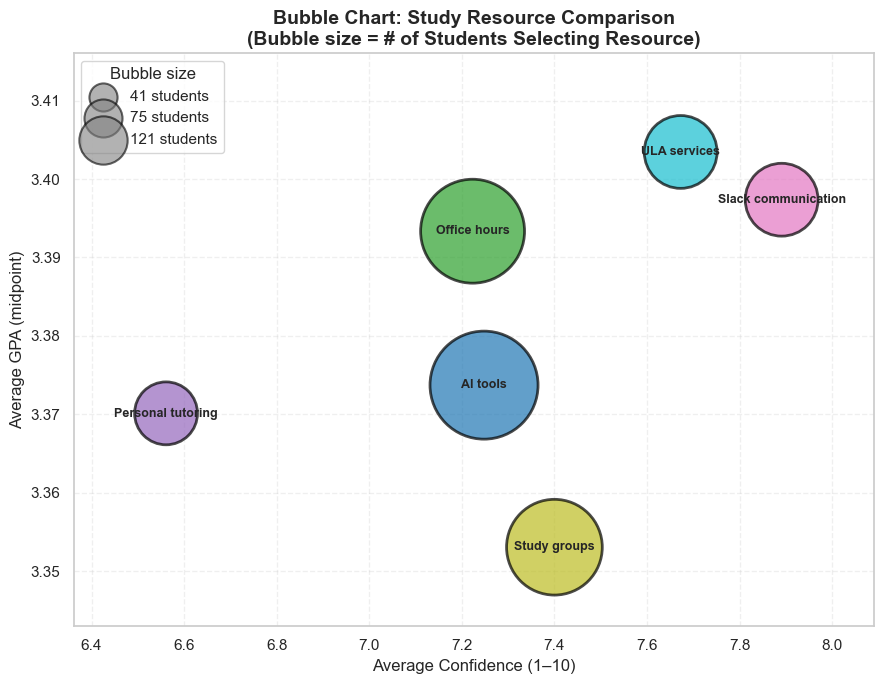

              Resource  mean_conf  mean_gpa  n_students
0             AI tools   7.247934  3.373719         121
1         Office hours   7.223214  3.393348         112
4         Study groups   7.400000  3.353053          95
3  Slack communication   7.890909  3.397364          55
5         ULA services   7.672727  3.403455          55
2    Personal tutoring   6.560976  3.370122          41


In [9]:
print("Distribution for Resources/Confidence and GPA-JM")
RES_COL = "Choose the resources that has been most helpful in your success in your favorite course. Choose all that apply.\n"
GPA_COL = "What is your current cumulative GPA?"
CONF_COL = "How confidently can you explain the following concepts to someone who hasn’t taken it? \n\n   FOR CS MAJORS/MINORS: Pointers, if/else statements, for/while loops\n   FOR DS MAJORS/MINORS: numpy, pandas, matplotlib, hypothesis testing"

df_h2 = df_original[[RES_COL, GPA_COL, CONF_COL]].copy()

#Cleaning data
df_h2 = df_h2.dropna(subset=[CONF_COL])

df_h2[GPA_COL] = df_h2[GPA_COL].astype(str).str.strip()
df = df_h2[df_h2[GPA_COL] != "Prefer not to say"].copy()

#Converting ranges to midpoints
gpa_mid = {
    "< 1.33": 1.165,
    "1.67 – 2.0": 1.835,
    "2.0 – 2.33": 2.165,
    "2.33 – 2.67": 2.50,
    "2.67 – 3.0": 2.835,
    "3.0 – 3.33": 3.165,
    "3.33 – 3.67": 3.50,
    "3.67 – 4.0": 3.835,
}
df_h2["GPA_mid"] = df_h2[GPA_COL].map(gpa_mid)
df_h2 = df_h2.dropna(subset=["GPA_mid"]).copy()

# Separates study resources into separate entries
df_h2[RES_COL] = df_h2[RES_COL].fillna("").astype(str).str.strip()
df_h2["Resource"] = df_h2[RES_COL].str.split(",")
df_h2 = df_h2.explode("Resource")
df_h2["Resource"] = df_h2["Resource"].astype(str).str.strip()

# Remove "No resources"
df_h2 = df_h2[~df_h2["Resource"].isin(["", "N/A", "No resources"])].copy()

bubble = (
    df_h2.groupby("Resource", as_index=False)
      .agg(
          mean_conf=(CONF_COL, "mean"),
          mean_gpa=("GPA_mid", "mean"),
          n_students=("Resource", "size")
      )
)

bubble = bubble[bubble["n_students"] >= 3].copy()

resources = bubble["Resource"].tolist()
confidence = bubble["mean_conf"].tolist()
gpa = bubble["mean_gpa"].tolist()
counts = bubble["n_students"].tolist()

palette = plt.cm.tab10(np.linspace(0, 1, max(3, len(resources))))
colors = [palette[i] for i in range(len(resources))]

plt.figure(figsize=(9, 7))

bubbles = plt.scatter(
    confidence, gpa,
    s=[c * 50 for c in counts],
    c=colors,
    alpha=0.7,
    edgecolors='black',
    linewidth=2
)

for i, name in enumerate(resources):
    plt.annotate(
        name,
        (confidence[i], gpa[i]),
        ha='center', va='center',
        fontweight='bold',
        fontsize=9
    )

plt.xlabel('Average Confidence (1–10)', fontsize=12)
plt.ylabel('Average GPA (midpoint)', fontsize=12)
plt.title('Bubble Chart: Study Resource Comparison\n(Bubble size = # of Students Selecting Resource)',
          fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3, linestyle='--')

x_range = max(confidence) - min(confidence)
y_range = max(gpa) - min(gpa)
plt.xlim(min(confidence) - x_range * 0.15, max(confidence) + x_range * 0.15)
plt.ylim(min(gpa) - y_range * 0.2, max(gpa) + y_range * 0.25)

legend_sizes = sorted(set([min(counts), int(np.median(counts)), max(counts)]))

legend_elements = [
    plt.scatter([], [], s=emp * 10, c='gray', alpha=0.6,
                edgecolors='black', linewidth=1.5,
                label=f'{emp} students')
    for emp in legend_sizes
]

plt.legend(handles=legend_elements, title="Bubble size", loc="upper left", frameon=True)

plt.tight_layout()
plt.show()
sns.set_theme(style="whitegrid")

print(bubble.sort_values("n_students", ascending=False))


CONTINGENCY TABLE: Office Hours vs GPA Level
GPA_level     1   2    3    4    5
Office_Hours                      
False         4  24  112  106  121
True          2   7   30   32   41

Row Totals: [367 112]
Column Totals: [  6  31 142 138 162]
Grand Total: 479


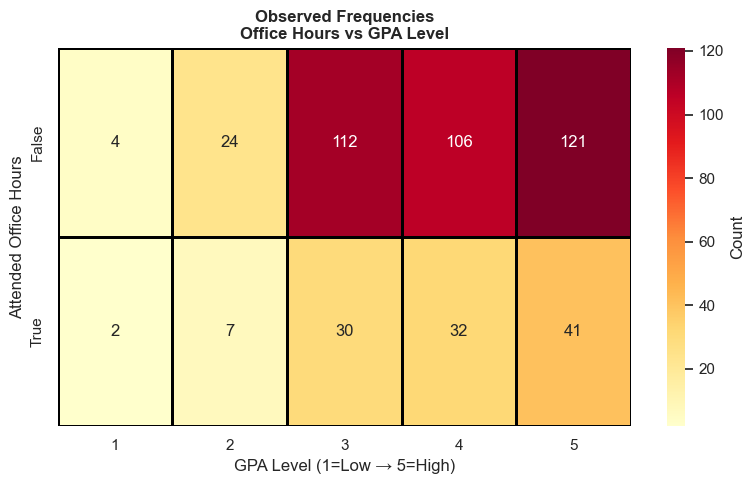

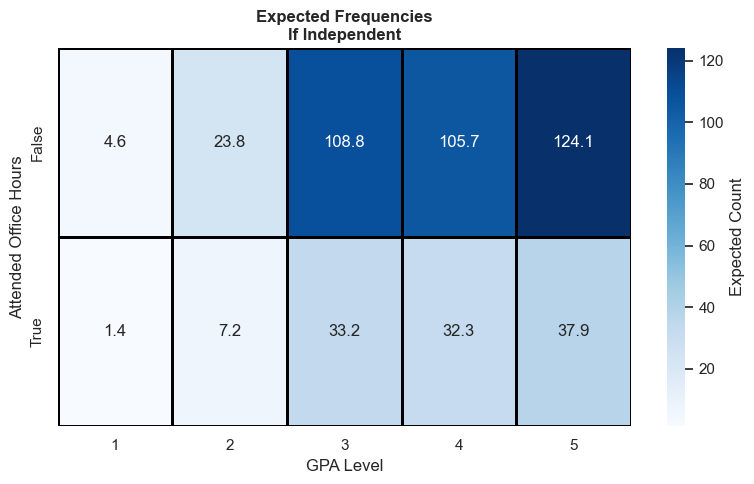


CHI-SQUARE TEST RESULTS
Chi-Square Statistic (χ²): 1.0845
P-value: 0.896728
Degrees of Freedom: 4
Critical Value at α=0.05: 9.4877

INTERPRETATION
✗ FAIL TO REJECT the null hypothesis
→ No statistically significant association found.

ASSUMPTION CHECK
Minimum expected cell count: 1.403
Percent of expected cells < 5: 20.0%


In [10]:
df_h2["Office_Hours"] = df_h2["Resource"] == "Office hours"

def gpa_to_level(x):
    if x < 2.0:
        return 1
    elif x < 2.7:
        return 2
    elif x < 3.3:
        return 3
    elif x < 3.7:
        return 4
    else:
        return 5

df_h2["GPA_level"] = df_h2["GPA_mid"].apply(gpa_to_level)

def conf_to_level(x):
    if x <= 2:
        return 1
    elif x <= 4:
        return 2
    elif x <= 6:
        return 3
    elif x <= 8:
        return 4
    else:
        return 5

df_h2["Confidence_level"] = df_h2[CONF_COL].apply(conf_to_level)

analysis_df = df_h2.dropna(subset=["GPA_level", "Confidence_level"]).copy()

observed = pd.crosstab(
    analysis_df["Office_Hours"],
    analysis_df["GPA_level"]
)

print("CONTINGENCY TABLE: Office Hours vs GPA Level")
print("=" * 50)
print(observed)
print("\nRow Totals:", observed.sum(axis=1).values)
print("Column Totals:", observed.sum(axis=0).values)
print("Grand Total:", observed.sum().sum())

chi_stat, p_value, degrees_freedom, expected_freq = chi2_contingency(observed)

plt.figure(figsize=(8,5))
sns.heatmap(
    observed,
    annot=True,
    fmt='d',
    cmap='YlOrRd',
    cbar_kws={'label': 'Count'},
    linewidths=1,
    linecolor='black'
)
plt.title('Observed Frequencies\nOffice Hours vs GPA Level', fontweight='bold')
plt.xlabel('GPA Level (1=Low → 5=High)')
plt.ylabel('Attended Office Hours')
plt.tight_layout()
plt.show()

expected = pd.DataFrame(expected_freq, index=observed.index, columns=observed.columns)

plt.figure(figsize=(8,5))
sns.heatmap(
    expected,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Expected Count'},
    linewidths=1,
    linecolor='black'
)
plt.title('Expected Frequencies\nIf Independent', fontweight='bold')
plt.xlabel('GPA Level')
plt.ylabel('Attended Office Hours')
plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("CHI-SQUARE TEST RESULTS")
print("=" * 50)
print(f"Chi-Square Statistic (χ²): {chi_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of Freedom: {degrees_freedom}")

critical_value = chi2.ppf(0.95, degrees_freedom)
print(f"Critical Value at α=0.05: {critical_value:.4f}")

print("\nINTERPRETATION")
print("=" * 50)

if p_value < 0.05:
    print("✓ REJECT the null hypothesis (independence)")
    print("→ Office Hours attendance IS statistically associated with GPA level.")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print("→ No statistically significant association found.")

min_expected = expected.values.min()
percent_under_5 = (expected.values < 5).mean() * 100

print("\nASSUMPTION CHECK")
print("=" * 50)
print(f"Minimum expected cell count: {min_expected:.3f}")
print(f"Percent of expected cells < 5: {percent_under_5:.1f}%")


CONTINGENCY TABLE: Office Hours vs Confidence Level
Confidence_level   1   2   3    4    5
Office_Hours                          
False             25  21  60  126  135
True               8   7  21   36   40

Row Totals: [367 112]
Column Totals: [ 33  28  81 162 175]
Grand Total: 479


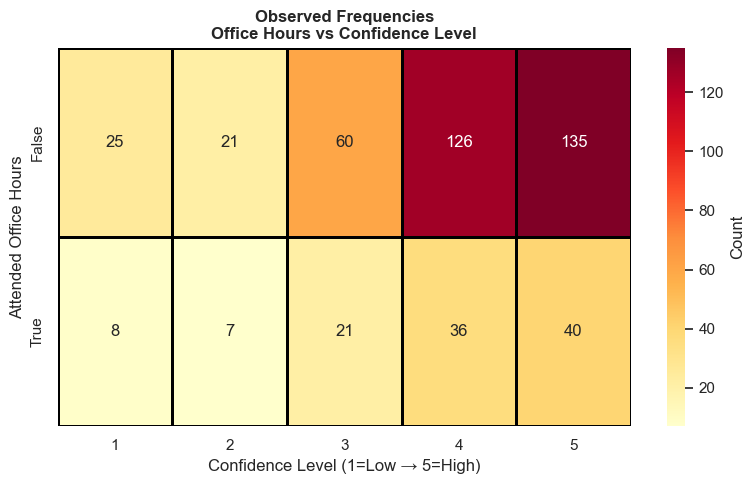

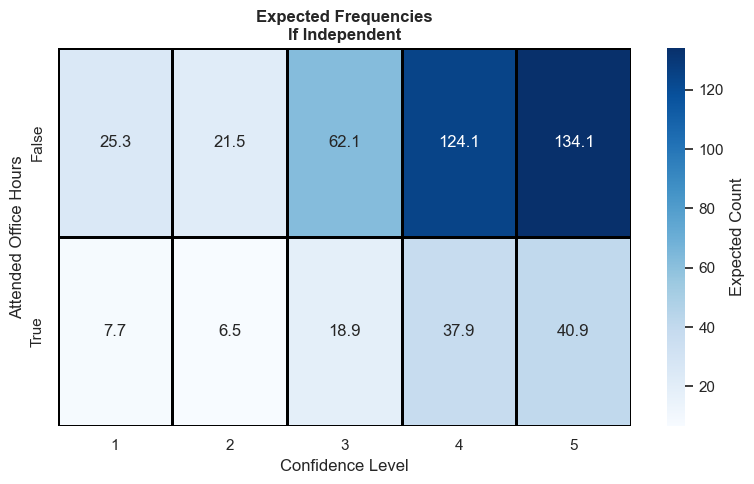


CHI-SQUARE TEST RESULTS
Chi-Square Statistic (χ²): 0.4957
P-value: 0.973918
Degrees of Freedom: 4
Critical Value at α=0.05: 9.4877

INTERPRETATION
✗ FAIL TO REJECT the null hypothesis
→ No statistically significant association found.

ASSUMPTION CHECK
Minimum expected cell count: 6.547
Percent of expected cells < 5: 0.0%


In [11]:
df_h2["Office_Hours"] = df_h2["Resource"] == "Office hours"

def conf_to_level(x):
    if x <= 2:
        return 1
    elif x <= 4:
        return 2
    elif x <= 6:
        return 3
    elif x <= 8:
        return 4
    else:
        return 5

df_h2["Confidence_level"] = df_h2[CONF_COL].apply(conf_to_level)

analysis_df = df_h2.dropna(subset=["Confidence_level"]).copy()
analysis_df["Confidence_level"] = analysis_df["Confidence_level"].astype(int)

level_order = [1, 2, 3, 4, 5]

observed = pd.crosstab(
    analysis_df["Office_Hours"],
    analysis_df["Confidence_level"]
).reindex(columns=level_order, fill_value=0)

print("CONTINGENCY TABLE: Office Hours vs Confidence Level")
print("=" * 50)
print(observed)
print("\nRow Totals:", observed.sum(axis=1).values)
print("Column Totals:", observed.sum(axis=0).values)
print("Grand Total:", observed.sum().sum())

chi_stat, p_value, degrees_freedom, expected_freq = chi2_contingency(observed)

plt.figure(figsize=(8,5))
sns.heatmap(
    observed,
    annot=True,
    fmt='d',
    cmap='YlOrRd',
    cbar_kws={'label': 'Count'},
    linewidths=1,
    linecolor='black'
)
plt.title('Observed Frequencies\nOffice Hours vs Confidence Level', fontweight='bold')
plt.xlabel('Confidence Level (1=Low → 5=High)')
plt.ylabel('Attended Office Hours')
plt.tight_layout()
plt.show()

expected = pd.DataFrame(expected_freq, index=observed.index, columns=observed.columns)

plt.figure(figsize=(8,5))
sns.heatmap(
    expected,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Expected Count'},
    linewidths=1,
    linecolor='black'
)
plt.title('Expected Frequencies\nIf Independent', fontweight='bold')
plt.xlabel('Confidence Level')
plt.ylabel('Attended Office Hours')
plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("CHI-SQUARE TEST RESULTS")
print("=" * 50)
print(f"Chi-Square Statistic (χ²): {chi_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of Freedom: {degrees_freedom}")

critical_value = chi2.ppf(0.95, degrees_freedom)
print(f"Critical Value at α=0.05: {critical_value:.4f}")

print("\nINTERPRETATION")
print("=" * 50)

if p_value < 0.05:
    print("✓ REJECT the null hypothesis (independence)")
    print("→ Office Hours attendance IS statistically associated with Confidence Level.")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print("→ No statistically significant association found.")

min_expected = expected.values.min()
percent_under_5 = (expected.values < 5).mean() * 100

print("\nASSUMPTION CHECK")
print("=" * 50)
print(f"Minimum expected cell count: {min_expected:.3f}")
print(f"Percent of expected cells < 5: {percent_under_5:.1f}%")


We are trying to show that using office hours is both the largest group and that it has the strongest association with GPA and confidence level compared to the other study resources. The bubble chart is appropriate because it allows us to compare average confidence, average GPA, and number of students using each resource simultaneously

From the bubble plot, we can see that office hours appears to be the largest group. People who used office hours on average had high GPA and confidence, but the difference in gpa and confidence level among the study resource groups is very small. Despite this small difference, we can see that those that used ULA services had a higher average gpa and confidence level than those who used office hours. The chi-square tests also failed to reject the null hypothesis for both GPA and confidence level. Therefore, there is no statistically significant evidence that office hours are associated with higher GPA or higher confidence.


### Hypothesis 3: Do people who feel confident in teaching material they’ve already learned correlate to how optimistic they feel about their career prospects after graduation?
##### We expect people who feel confident in teaching the material will be optimistic about getting a job after graduation.
**Spider Chart and CHI-SQUARED TEST**

Distribution for Confidence Level and Career Prospects-JM


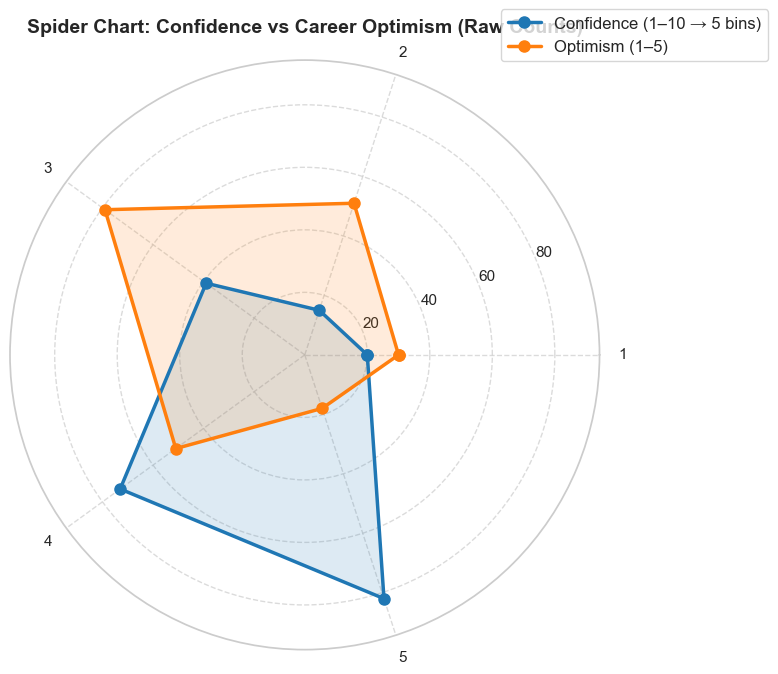

Confidence counts (bins 1..5): [20 15 39 73 82]
Optimism counts (1..5):        [30 51 79 51 18]


In [12]:
print("Distribution for Confidence Level and Career Prospects-JM")
df_h1 = df_original.copy()
#Storing columns from df
conf_col = (
    "How confidently can you explain the following concepts to someone who hasn’t taken it? \n\n"
    "   FOR CS MAJORS/MINORS: Pointers, if/else statements, for/while loops\n"
    "   FOR DS MAJORS/MINORS: numpy, pandas, matplotlib, hypothesis testing"
)

opt_col = (
    "Please indicate how much you agree with the following statements regarding the current job market in your major.  "
    "(Each row should have one answer) [I feel optimistic about my career prospects in this field]"
)

#Dropping empty rows from confidence column
conf = df_h1[conf_col].dropna()

#Binning the confidence levels so it fits on a 5 level scale
conf_bins = {
    1: [1, 2],
    2: [3, 4],
    3: [5, 6],
    4: [7, 8],
    5: [9, 10],
}

#Counting Responses
conf_counts = np.array([conf.isin(conf_bins[k]).sum() for k in range(1, 6)])

#Converting Text responses to numeric
opt_map = {
    "Strongly Disagree (1)": 1,
    "Disagree (2)": 2,
    "3 (3)": 3,
    "Agree (4)": 4,
    "Strongly Agree (5)": 5,
}

opt = df_h1[opt_col].map(opt_map).dropna()

opt_counts = opt.value_counts().reindex([1, 2, 3, 4, 5], fill_value=0).values

metrics = ["1", "2", "3", "4", "5"]
num_metrics = len(metrics)

theta = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)
theta = np.concatenate((theta, [theta[0]]))

datasets = [conf_counts, opt_counts]
labels = ["Confidence (1–10 → 5 bins)", "Optimism (1–5)"]
colors = ["#1f77b4", "#ff7f0e"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for i in range(2):
    values = np.concatenate((datasets[i], [datasets[i][0]]))  # close polygon

    ax.plot(
        theta,
        values,
        linewidth=2.5,
        linestyle="solid",
        label=labels[i],
        color=colors[i],
        marker="o",
        markersize=8,
    )
    ax.fill(theta, values, alpha=0.15, color=colors[i])

ax.set_xticks(theta[:-1])
ax.set_xticklabels(metrics, fontsize=11)

ax.set_ylim(0, max(conf_counts.max(), opt_counts.max()) * 1.15)
ax.grid(True, linestyle="--", alpha=0.7)

ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=12)
ax.set_title(
    "Spider Chart: Confidence vs Career Optimism (Raw Counts)",
    fontsize=14,
    fontweight="bold",
    pad=20,
)

plt.tight_layout()
plt.show()
sns.set_theme(style="whitegrid")

print("Confidence counts (bins 1..5):", conf_counts)
print("Optimism counts (1..5):       ", opt_counts)


CONTINGENCY TABLE: Observed Frequencies
Optimism_level     1   2   3   4   5
Confidence_level                    
1                  3   2   5   4   5
2                  2   3   6   2   2
3                  4   6  21   7   1
4                  5  22  25  21   0
5                 16  18  22  16  10

Row Totals: [19 15 39 73 82] (Confidence Levels 1..5)
Column Totals: [30 51 79 50 18] (Optimism Levels 1..5)
Grand Total: 228 responses used


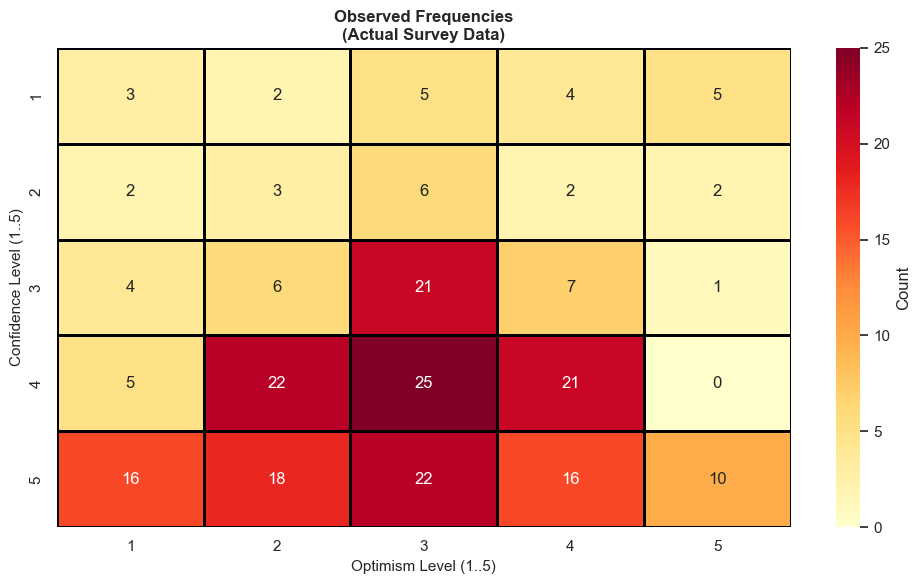

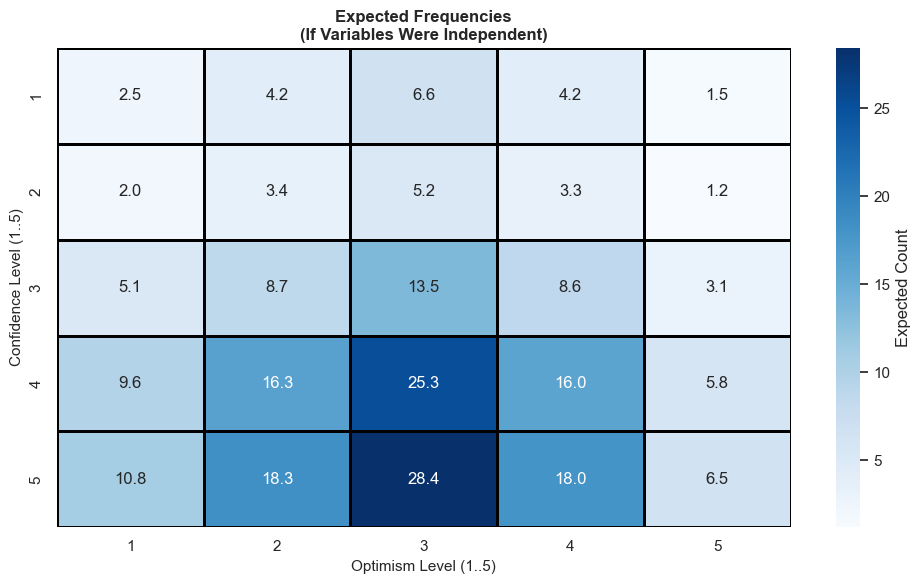


CHI-SQUARE TEST RESULTS
Chi-Square Statistic (χ²): 35.6178
P-value: 0.003268
Degrees of Freedom: 16

Significance Level: α = 0.05
Critical Value at α=0.05: 26.2962

INTERPRETATION
✓ REJECT the null hypothesis (independence)
  → The p-value (0.003268) is less than 0.05
  → The χ² statistic (35.6178) exceeds the critical value (26.2962)

  CONCLUSION: Confidence and optimism ARE associated!
  There is a statistically significant relationship between confidence level and career optimism.

ASSUMPTION CHECK (Expected Counts)
Minimum expected cell count: 1.184
Percent of expected cells < 5: 36.0%


In [13]:
conf_numeric = pd.to_numeric(df_h1[conf_col], errors="coerce")

def conf_to_level(x):
    if pd.isna(x):
        return np.nan
    x = int(x)
    for level, vals in conf_bins.items():
        if x in vals:
            return level
    return np.nan

df_h1["Confidence_level"] = conf_numeric.apply(conf_to_level)

df_h1["Optimism_level"] = df_h1[opt_col].map(opt_map)

analysis_df = df_h1.dropna(subset=["Confidence_level", "Optimism_level"]).copy()
analysis_df["Confidence_level"] = analysis_df["Confidence_level"].astype(int)
analysis_df["Optimism_level"] = analysis_df["Optimism_level"].astype(int)

level_order = [1, 2, 3, 4, 5]

observed = pd.crosstab(
    analysis_df["Confidence_level"],
    analysis_df["Optimism_level"]
).reindex(index=level_order, columns=level_order, fill_value=0)

print("CONTINGENCY TABLE: Observed Frequencies")
print("=" * 50)
print(observed)
print("\nRow Totals:", observed.sum(axis=1).values, "(Confidence Levels 1..5)")
print("Column Totals:", observed.sum(axis=0).values, "(Optimism Levels 1..5)")
print("Grand Total:", observed.sum().sum(), "responses used")

chi_stat, p_value, degrees_freedom, expected_freq = chi2_contingency(observed)

plt.figure(figsize=(10, 6))
sns.heatmap(
    observed,
    annot=True,
    fmt='d',
    cmap='YlOrRd',
    cbar_kws={'label': 'Count'},
    linewidths=1,
    linecolor='black'
)
plt.title('Observed Frequencies\n(Actual Survey Data)', fontsize=12, fontweight='bold')
plt.xlabel('Optimism Level (1..5)', fontsize=11)
plt.ylabel('Confidence Level (1..5)', fontsize=11)
plt.tight_layout()
plt.show()

expected = pd.DataFrame(expected_freq, index=observed.index, columns=observed.columns)

plt.figure(figsize=(10, 6))
sns.heatmap(
    expected,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Expected Count'},
    linewidths=1,
    linecolor='black'
)
plt.title('Expected Frequencies\n(If Variables Were Independent)', fontsize=12, fontweight='bold')
plt.xlabel('Optimism Level (1..5)', fontsize=11)
plt.ylabel('Confidence Level (1..5)', fontsize=11)
plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("CHI-SQUARE TEST RESULTS")
print("=" * 50)
print(f"Chi-Square Statistic (χ²): {chi_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of Freedom: {degrees_freedom}")
print(f"\nSignificance Level: α = 0.05")

# Critical value at alpha=0.05
critical_value = chi2.ppf(0.95, degrees_freedom)
print(f"Critical Value at α=0.05: {critical_value:.4f}")

print("\n" + "=" * 50)
print("INTERPRETATION")
print("=" * 50)

if p_value < 0.05:
    print("✓ REJECT the null hypothesis (independence)")
    print(f"  → The p-value ({p_value:.6f}) is less than 0.05")
    print(f"  → The χ² statistic ({chi_stat:.4f}) exceeds the critical value ({critical_value:.4f})")
    print("\n  CONCLUSION: Confidence and optimism ARE associated!")
    print("  There is a statistically significant relationship between confidence level and career optimism.")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print(f"  → The p-value ({p_value:.6f}) is greater than 0.05")
    print(f"  → The χ² statistic ({chi_stat:.4f}) is below the critical value ({critical_value:.4f})")
    print("\n  CONCLUSION: Cannot conclude that confidence and optimism are associated.")
    print("  The data is consistent with independence.")

min_expected = expected.values.min()
percent_under_5 = (expected.values < 5).mean() * 100

print("\n" + "=" * 50)
print("ASSUMPTION CHECK (Expected Counts)")
print("=" * 50)
print(f"Minimum expected cell count: {min_expected:.3f}")
print(f"Percent of expected cells < 5: {percent_under_5:.1f}%")


We are trying to show that there is a correlation between confidence level in class material and optimism for future job prospects. A spider chart is appropriate because both sets of data are ordinal and can be fit to the same 1-5 scale. This type of chart allows us to see and determine whether the two data sets have a similar trend.
    From the spider chart, we observe that while there is some overlap between the two distributions, they peak at different levels. Confidence peaks at levels 4 and 5, whereas optimism peaks around levels 2 and 3. This indicates that students tend to report higher confidence than optimism. The chi-square test results lead us to reject the null hypothesis, which means that there is an association between the two data sets.


### Inference 1: What types of classes do students believe help them the most for their careers?
##### We want to observe if class standing affects the types of classes students believe are important for their careers.

**Stacked Bar Chart and CHI SQUARED TEST**

Students by Class Standing and Favorite Class-ES


/var/folders/fg/4z6y00h51sq3hsdxx772d9f00000gn/T/ipykernel_99615/3458162935.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  standing_class = df_i1.groupby('Standing')[class_cols].sum()


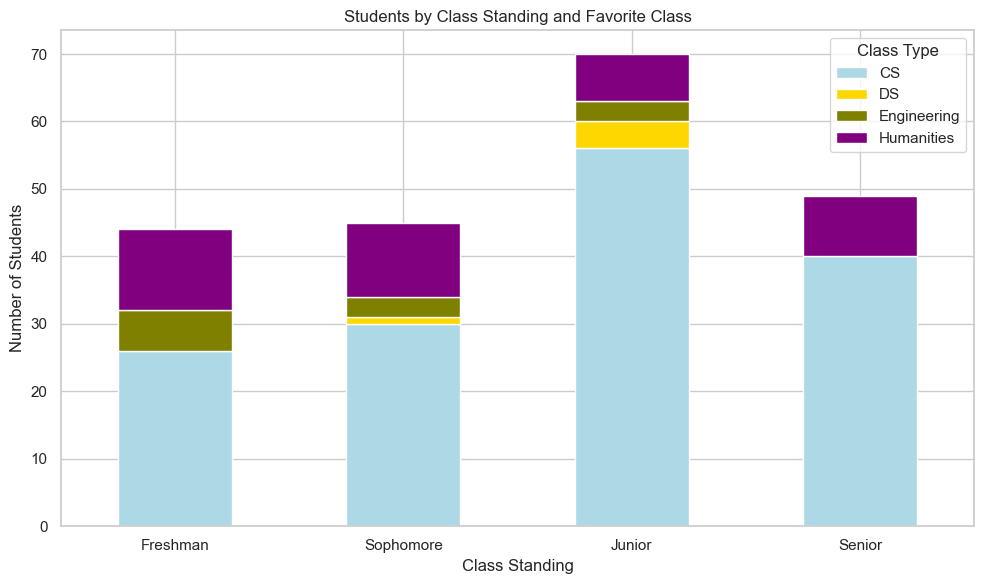

CONTINGENCY TABLE: Observed Frequencies
           CS  DS  Engineering  Humanities
Standing                                  
Freshman   26   0            6          12
Sophomore  30   1            3          11
Junior     56   4            3           7
Senior     40   0            0           9

Row Totals: [44 45 70 49] (Freshman, Sophomore, Junior, Senior)
Column Totals: [152   5  12  39] (CS, DS, Engineering, Humanities)
Grand Total: 208 students surveyed


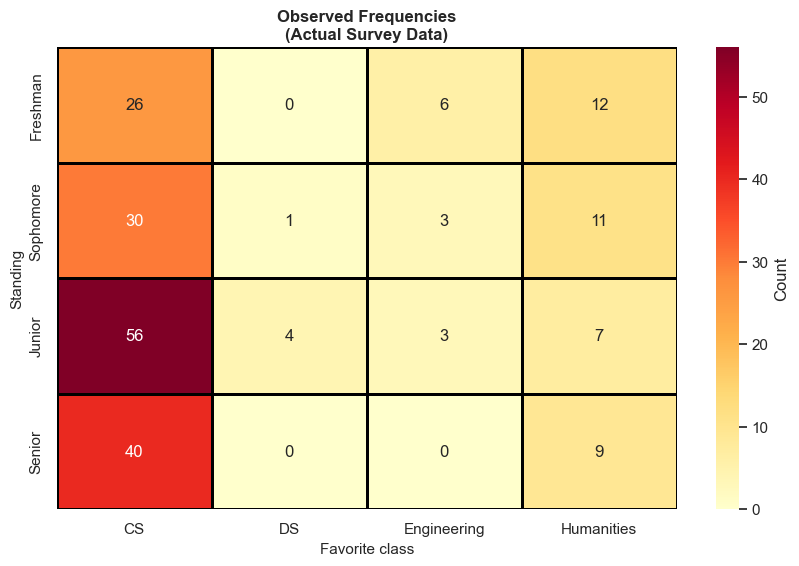

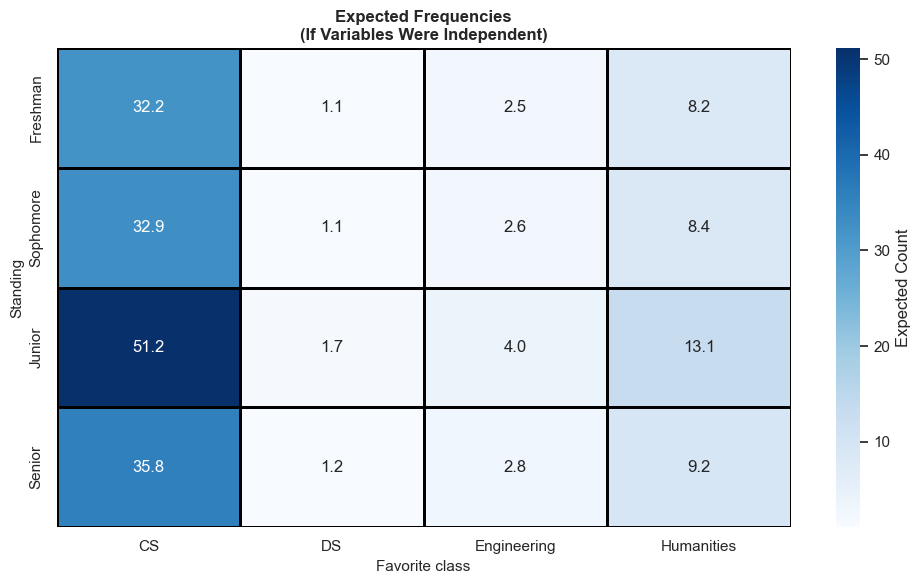


CHI-SQUARE TEST RESULTS
Chi-Square Statistic (χ²): 21.0358
P-value: 0.012493
Degrees of Freedom: 9

Significance Level: α = 0.05
Critical Value at α=0.05: 16.9190

INTERPRETATION
✓ REJECT the null hypothesis (independence)
  → The p-value (0.012493) is less than 0.05
  → The χ² statistic (21.0358) exceeds the critical value (16.9190)

  CONCLUSION: Standing and favorite class ARE associated!
  There is a statistically significant relationship between class standing and favorite class preferences.

KEY INSIGHTS FROM THE DATA
• The distribution patterns differ dramatically between favorite class!
• Observed frequencies deviate significantly from expected frequencies
• This strong association is reflected in the very high χ² value and very low p-value


In [14]:
print("Students by Class Standing and Favorite Class-ES")
df_i1 = df_original.copy()

# rename columns for clarity
df_i1 = df_original.rename(columns={
    'What class(es) do you think prepared you most for the career field you want to pursue? CS courses': 'CS',
    'What class(es) do you think prepared you most for the career field you want to pursue? ENGINEERING': 'Engineering',
    'What class(es) do you think prepared you most for the career field you want to pursue? DS courses': 'DS',
    'What class(es) do you think prepared you most for the career field you want to pursue? Humanities': 'Humanities',
    'What is your current class standing?': 'Standing'
})

# all class columns are either 0 or 1
class_cols = ['CS', 'DS', 'Engineering', 'Humanities']
df_i1[class_cols] = df_i1[class_cols].notna().astype(int)

# class standings in order
class_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']
df_i1['Standing'] = pd.Categorical(df_i1['Standing'], categories=class_order, ordered=True)

# count total number of people who wrote something based on class standing
standing_class = df_i1.groupby('Standing')[class_cols].sum()

# Plot stacked bar chart
standing_class.plot(kind='bar', stacked=True, figsize=(10,6), color=['lightblue', 'gold', 'olive', 'purple'])

plt.title("Students by Class Standing and Favorite Class")
plt.xlabel("Class Standing")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.legend(title="Class Type")
plt.tight_layout()
plt.show()

print("CONTINGENCY TABLE: Observed Frequencies")
print("=" * 50)
print(standing_class)
print("\nRow Totals:", standing_class.sum(axis=1).values, "(Freshman, Sophomore, Junior, Senior)")
print("Column Totals:", standing_class.sum(axis=0).values, "(CS, DS, Engineering, Humanities)")
print("Grand Total:", standing_class.sum().sum(), "students surveyed")

# Step 3: Perform the Chi-Square Test of Independence
chi_stat, p_value, degrees_freedom, expected_freq = chi2_contingency(standing_class)

# Subplot 1: Heatmap of observed counts
plt.figure(figsize=(10,6))
sns.heatmap(standing_class, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'}, 
            linewidths=1, linecolor='black')
plt.title('Observed Frequencies\n(Actual Survey Data)', fontsize=12, fontweight='bold')
plt.xlabel('Favorite class', fontsize=11)
plt.ylabel('Standing', fontsize=11)

# Create expected frequencies DataFrame for visualization
expected = pd.DataFrame(expected_freq, 
                        index=standing_class.index, 
                        columns=standing_class.columns)

plt.figure(figsize=(10,6))
sns.heatmap(expected, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Expected Count'}, 
            linewidths=1, linecolor='black')
plt.title('Expected Frequencies\n(If Variables Were Independent)', fontsize=12, fontweight='bold')
plt.xlabel('Favorite class', fontsize=11)
plt.ylabel('Standing', fontsize=11)

plt.tight_layout()
plt.show()

# Step 4: Display test results
print("\n" + "=" * 50)
print("CHI-SQUARE TEST RESULTS")
print("=" * 50)
print(f"Chi-Square Statistic (χ²): {chi_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of Freedom: {degrees_freedom}")
print(f"\nSignificance Level: α = 0.05")

# Get critical value for 95% confidence (α = 0.05)
critical_value = chi2.ppf(0.95, degrees_freedom)
print(f"Critical Value at α=0.05: {critical_value:.4f}")

# Step 5: Interpret the results
print("\n" + "=" * 50)
print("INTERPRETATION")
print("=" * 50)

if p_value < 0.05:
    print("✓ REJECT the null hypothesis (independence)")
    print(f"  → The p-value ({p_value:.6f}) is less than 0.05")
    print(f"  → The χ² statistic ({chi_stat:.4f}) exceeds the critical value ({critical_value:.4f})")
    print("\n  CONCLUSION: Standing and favorite class ARE associated!")
    print("  There is a statistically significant relationship between class standing and favorite class preferences.")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print(f"  → The p-value ({p_value:.6f}) is greater than 0.05")
    print(f"  → The χ² statistic ({chi_stat:.4f}) is below the critical value ({critical_value:.4f})")
    print("\n  CONCLUSION: Cannot conclude that class standing and favorite class are associated.")
    print("  The data is consistent with independence.")

print("\n" + "=" * 50)
print("KEY INSIGHTS FROM THE DATA")
print("=" * 50)
print("• The distribution patterns differ dramatically between favorite class!")
print("• Observed frequencies deviate significantly from expected frequencies")
print("• This strong association is reflected in the very high χ² value and very low p-value")
sns.set_theme(style="whitegrid")

Our visualization shows a stacked bar chart with the class standing on the bottom with separations of the different classes people can take. The chart shows that people find CS classes to be more useful in their future career field with humanities classes coming in second place. The chi-square test we did below also shows that our hypothesis looking at class standing and class preference is associated.

### Inference 2: What determines a student's favorite course?
##### We want to observe what variables make classes enjoyable.

**Heatmap**

Distribution for why a favorite course is favored-AL


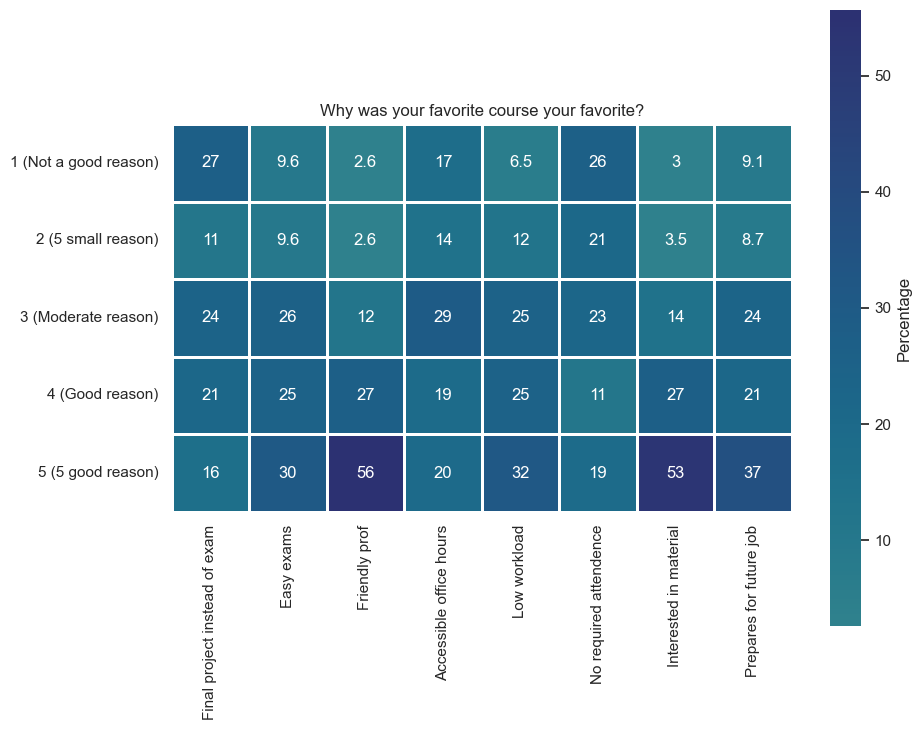

In [15]:
print("Distribution for why a favorite course is favored-AL")
favorite_course = df_original.loc[:, 
                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Final project instead of exam]":
                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Prepares for future job]"
            ].copy()

favorite_course = favorite_course.rename(columns={"Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Final project instead of exam]":"Final project instead of exam",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Easy exams]":"Easy exams",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Friendly professor]":"Friendly prof",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Accessible office hours]":"Accessible office hours",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Low workload]":"Low workload",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [No required attendence]":"No required attendence",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Interested in material]":"Interested in material",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\n [Prepares for future job]":"Prepares for future job"})

favorite_course = favorite_course.apply(pd.Series.value_counts, args=(1, 2)) * 100 

plt.figure(figsize=(10, 8))
plt.title("Why was your favorite course your favorite?")
sns.heatmap(data=favorite_course, center=0, cmap="crest", annot=True, square=True, linewidths=1, cbar_kws={"label":"Percentage"})
plt.show()

We can see from the data that the features that were most "hot" for answering the question "Why was your favorite course your favorite?" were having a Friendly Prof and being interested in the material. The features that were least correlated were "final project" over exam and "no required attendence". 

### Inference 3: Does Gender affect the to ability to concentrate in different scenarios?
##### We want to observe if different genders struggle/exceed at concentrating.
**Stacked Bar Chart**

Major and Gender by Proportion-MH


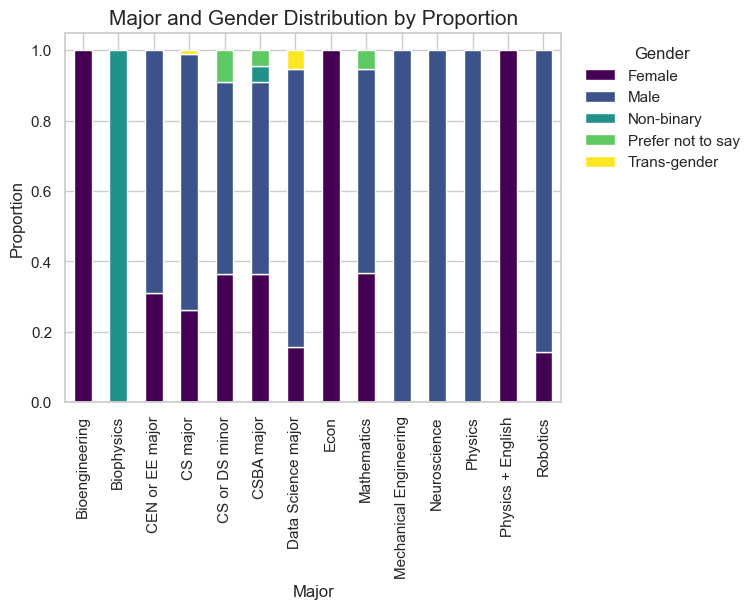

In [ ]:
print("Major and Gender by Proportion-MH")
df_i3 = df_original.copy()
major_col = 'What is your major/minor? (If your major is not listed, please write it in "Other..")'
gender_col = 'What gender do you identify as?'

df_i3["Major_clean"] = (df_i3[major_col].astype(str).str.strip())

major_lower = df_i3["Major_clean"].str.lower()

#combines Mechanical Engineering
mech_combine = major_lower.str.contains(r"\bmse\b|mechanical", na=False)
df_i3.loc[mech_combine, "Major_clean"] = "Mechanical Engineering"

#combines Robotics
robot_combine = major_lower.str.contains(r"robot", na=False)
df_i3.loc[robot_combine, "Major_clean"] = "Robotics"

#combines math
math_combine = major_lower.str.contains(r"math", na=False)
df_i3.loc[math_combine, "Major_clean"] = "Mathematics"

major_gender_table = pd.crosstab(df_i3["Major_clean"], df_i3[gender_col])

major_gender_proportion = major_gender_table.div(major_gender_table.sum(axis=1), axis=0)
major_gender_proportion.plot(kind='bar', stacked=True, colormap="viridis")

plt.title('Major and Gender Distribution by Proportion', fontsize=14)
plt.ylabel('Proportion')
plt.xlabel('Major')
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), frameon=False)
plt.show()

This Bar Chart is to show the distribution of gender between the different majors to get an idea of what our sample looks like.

**Parallel Coordinate Plot**

Distribution for Concentration and Gender-AL


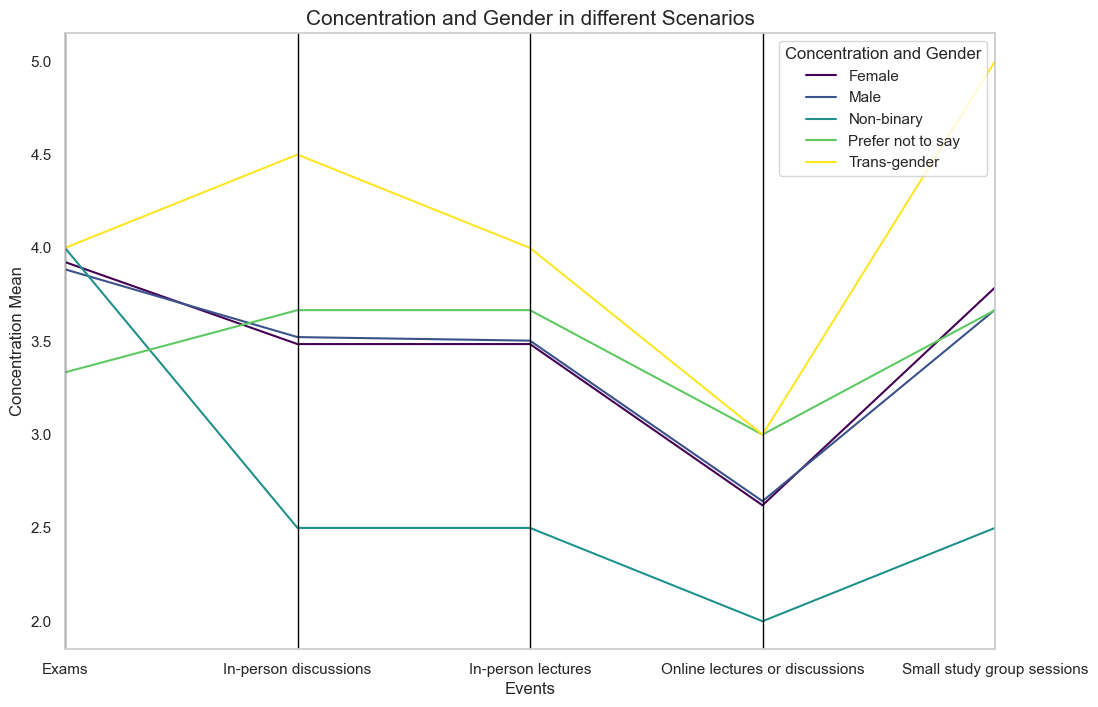

In [17]:
print("Distribution for Concentration and Gender-AL")
identity_concentration = df_original.iloc[:, 13:18].copy()
identity_concentration["Identity"] = df_original["What gender do you identify as?"]

identity_concentration = identity_concentration.rename(columns={identity_concentration.columns[0]:"In-person lectures",
                                                                identity_concentration.columns[1]:"In-person discussions",
                                                                identity_concentration.columns[2]:"Online lectures or discussions",
                                                                identity_concentration.columns[3]:"Small study group sessions",
                                                                identity_concentration.columns[4]:"Exams"})

identity_concentration_pivot = pd.pivot_table(data=identity_concentration, values=identity_concentration.loc[:, "In-person lectures":"Exams"], index="Identity", aggfunc="mean")
identity_concentration_pivot["Classes"] = identity_concentration_pivot.index

plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(identity_concentration_pivot, "Classes", colormap='viridis', alpha=1.0)
plt.title('Concentration and Gender in different Scenarios', fontsize=15)
plt.xlabel('Events', fontsize=12)
plt.ylabel('Concentration Mean', fontsize=12)
plt.legend(title='Concentration and Gender', loc='upper right')
sns.set_theme(style="whitegrid")
plt.show()

From the data we see that specifically for males and females there is almost no difference in how much they are able to concentrate in each event. Interestingly for non-binary, transgender, and "prefer not to say" they all differed by varying amounts. This could simply be from a lack of sample size though. Despite that we can see around the same trend for each gender, in which the concentration from in-person discussion to in-person lecture barely changes, then steeply drops when it comes to online lectures or discussions, and then rises during small study group sessions. We can see concentration is the highest usually during exams and lowest during online lecures or discussions.

### Overall conclusion
We conclude that student behavior does follow a specific trend, especially when it comes it to burnout. Knowing that students to sacrifice sleep when exams come up we can understand why Office hours and ULA services are two of the most important resources that contribute to higher GPAs and confidence levels. Looking at our class distributions we see that CS related courses are the most valuable in teaching skills that students will need for their future careers. This is understandable because most individuals who took this survey want to go into a CS related field and from our heatmap we see that the reason most students enjoyed their favorite class is because they were interested in the material. When we look into concentration in different scenarios, there does not see to be a distinct difference of concentration levels between genders. Although we can see that all individuals do seem to struggle the most when it comes to concentrating on online lectures and discussion. This sugests that a students performance is likely to suffer if they are in a online learning enviornment. 

### Group Contributions
``initials are above exact charts``

Magalie Huertero

    -Clean Data
    -Ridge plot and Stacked bar charts +description
    -Main pynb file

Emilia Silverman

    -Stacked Bar Chart +description
    -Time series +description

Arik Lee

    -Heatmap +description
    -Parallel Plot +description
    
Jonah Millard

    -Spider Chart +description
    -Bubble Chart +description
